In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import os
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [71]:
mypath = os.getcwd() + "\\csv files\\"

In [72]:
filenames = next(os.walk(mypath), (None, None, []))[2]  # [] if no file
filenames

['anual_labor_gdp.csv',
 'empleo informal.csv',
 'ganancias promedio por ocupacion.csv',
 'manufactoring employment.csv',
 'modern_slavery.csv',
 'national compliance with labour rights.csv',
 'occupational_injuries.csv',
 'social_protection.csv',
 'unemployment.csv',
 'working_poverty_rate.csv',
 'youth15-24_unemployment.csv']

In [73]:
df_1 = pd.read_csv(mypath + filenames[0], header=0, sep=",", usecols = ["ref_area.label","time","obs_value"])
df_1 = df_1.rename(columns={"obs_value": "labor_gdp","ref_area.label":"country"})
df_2 = pd.read_csv(mypath + filenames[1], header=0, sep=",")#, usecols = ["ref_area.label","time","obs_value"])
df_2 = df_2.rename(columns={"Country":"country","Total":"Total_informal"})
df_3 = pd.read_csv(mypath + filenames[2], header=0, sep=",")
df_3 = df_3.rename(columns={"Country":"country","Total":"Total_ocupacion"})
df_4 = pd.read_csv(mypath + filenames[3], header=0, sep=",", usecols = ["ref_area.label","time","obs_value"])
df_4 = df_4.rename(columns={"obs_value": "manufactoring_employment","ref_area.label":"country"})

df_6 = pd.read_csv(mypath + filenames[5], header=0, sep=",")
df_7 = pd.read_csv(mypath + filenames[6], header=0, sep=",")
df_7 = df_7.rename(columns={"Country":"country","Total":"nonletal_injuries"})
df_8 = pd.read_csv(mypath + filenames[7], header=0, sep=",")
df_8 = df_8.rename(columns={"Country":"country"})
df_9 = pd.read_csv(mypath + filenames[8], header=0, sep=",")
df_10 = pd.read_csv(mypath + filenames[9], header=0, sep=",")
df_11 = pd.read_csv(mypath + filenames[10], header=0, sep=",")

In [74]:
df_slavery = pd.read_csv(mypath + filenames[4], header=0, sep=",")
df_slavery = df_slavery.rename(columns={"Country ": "country"})
df_slavery = df_slavery.replace("Bolivia, Plurinational State of", "Bolivia")
df_slavery.dropna(subset = ['Est. prevalence of population in modern slavery (victims per 1,000 population)'],inplace=True)
df_slavery.drop(['Est. number of people in modern slavery','Support survivors','Criminal justice','Coordination','Address risk','Supply chains','SUM/104', 'SUM Neg'],axis=1,inplace=True)
df_slavery = df_slavery.rename(columns={'%':'Support survivors','%.1':'Criminal justice','%.2':'Coordination','%.3':'Address risk','%.4':'Supply chains'})

In [75]:
df_slavery = df_slavery[["Factor One Governance Issues ","Factor Five Effects of Conflict","country","Region", "Final overall (normalised, weighted) vulnerability score", 'Credit rating']]
#df_slavery = df_slavery.drop(["Population"],axis=1)

In [76]:
df = pd.merge(df_slavery, df_1.loc[df_1["time"]==2017], on='country', how='left').drop("time",axis=1)

df_tmp = df_2.loc[df_2["Year"].isin([2016,2017,2018])].copy()
df_tmp = df_tmp.groupby("country").agg({"Agriculture":"median","Non-agriculture":"median","Total_informal":"median"})
df = pd.merge(df, df_tmp, on='country', how='left')

df_tmp = df_3.loc[df_3["Year"].isin([2016,2017,2018])].copy()
df_tmp.drop(["0. Armed forces occupations","X. Not elsewhere classified"],axis=1,inplace=True)
df_tmp.dropna(inplace=True)
df_tmp = df_tmp.groupby("country").median().drop("Year",axis=1)
df = pd.merge(df, df_tmp, on='country', how='left')

df_tmp = df_4.loc[df_4["time"].isin([2019, 2018, 2017])].copy()
df_tmp = df_tmp.groupby("country").median().drop("time",axis=1)
df = pd.merge(df, df_tmp, on='country', how='left')

df_tmp = df_6.loc[df_6["time"].isin([2019,2018, 2017])].copy()
df_tmp = df_tmp.groupby("country").median().drop("time",axis=1)
df = pd.merge(df, df_tmp, on='country', how='left')

df_tmp = df_7[["country","nonletal_injuries","Year"]].loc[df_7["Year"].isin([2019, 2018, 2017, 2016])].copy()
df_tmp = df_tmp.groupby("country").median().drop("Year",axis=1)
df = pd.merge(df, df_tmp, on='country', how='left')

df_tmp = df_8.loc[df_8["Year"].isin([2020, 2019, 2018, 2017,2016])].copy()
df_tmp = df_tmp.groupby("country").median().drop(["Year","Mothers with newborns receiving maternity benefits"],axis=1)
df = pd.merge(df, df_tmp, on='country', how='left')

df_tmp = df_9.loc[df_9["time"].isin([2018, 2017, 2016])].copy()
df_tmp = df_tmp.groupby("country").median().drop("time",axis=1)
df = pd.merge(df, df_tmp, on='country', how='left')

df_tmp = df_10.loc[df_10["time"].isin([2018, 2017, 2016])].copy()
df_tmp = df_tmp.groupby("country").median().drop("time",axis=1)
df = pd.merge(df, df_tmp, on='country', how='left')

df_tmp = df_11.loc[df_11["time"].isin([2018, 2017, 2016])].copy()
df_tmp = df_tmp.groupby("country").median().drop("time",axis=1)
df = pd.merge(df, df_tmp, on='country', how='left')

In [104]:
h = pd.DataFrame(df.groupby("Region").mean()["Final overall (normalised, weighted) vulnerability score"]).reset_index()

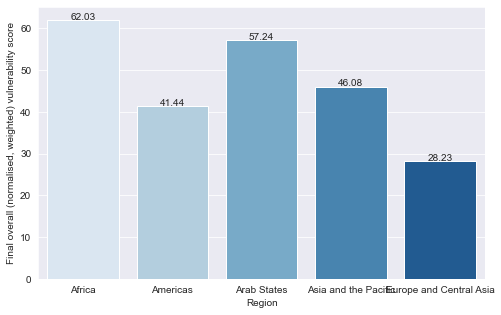

In [110]:
plt.subplots(figsize = (8,5))
x = sns.barplot(x=h["Region"],y=h["Final overall (normalised, weighted) vulnerability score"], palette="Blues")
i = 0
for p in x.patches:
    height = p.get_height()
    x.text(p.get_x()+p.get_width()/2., height + 0.1,
        df.groupby("Region").mean()["Final overall (normalised, weighted) vulnerability score"][i].round(2),ha="center")
    i += 1
#plt.savefig(carpeta + "imagenes\\" + 'segmentos_cli.png')
plt.show()

In [77]:
region_mean = df.groupby("Region").mean()
region_mean

,Factor One Governance Issues,Factor Five Effects of Conflict,"Final overall (normalised, weighted) vulnerability score",labor_gdp,Agriculture,Non-agriculture,Total_informal,1. Managers,2. Professionals,3. Technicians and associate professionals,...,Employed covered in the event of work injury,Persons above retirement age receiving a pension,Persons with severe disabilities collecting disability social protection benefits,Poor persons covered by social protection systems,Population covered by at least one social protection benefit,Unemployed receiving unemployment benefits,Vulnerable persons covered by social assistance,unemployment_rate_+15,poverty_rate,youth_nini
Region,,,,,,,,,,,,,,,,,,,,,
Africa,60.786275,35.701961,62.033333,44.514000,89.877778,73.502778,77.736111,624.480000,429.833333,687.376667,...,20.051250,23.502500,8.965789,16.931250,15.355714,1.218605,8.748333,9.316481,31.733750,30.438269
Americas,44.285185,22.870370,41.440741,51.929630,76.997222,53.100000,57.744444,1945.105882,1287.485294,976.511765,...,46.043478,57.757407,42.747917,48.487500,49.370370,14.270833,31.416000,6.230385,4.170000,20.141667
Arab States,64.836364,40.009091,57.236364,35.863636,91.800000,44.950000,46.600000,834.850000,671.250000,573.600000,...,58.950000,29.940909,9.205556,41.500000,34.160000,10.641667,23.710000,6.119286,6.830000,37.300000
Asia and the Pacific,49.267857,32.357143,46.082143,44.110714,94.008333,65.975000,74.150000,851.273333,718.393333,573.943333,...,41.005769,54.416667,36.930000,68.183333,43.424074,15.794444,33.373077,4.982200,6.303600,20.135870
Europe and Central Asia,34.570000,20.076000,28.234000,51.913043,76.728571,24.657143,38.214286,3676.363333,2566.143333,2059.260000,...,69.780488,92.844444,91.740909,89.043939,77.775556,42.670652,64.335294,8.746383,0.991765,13.856395


In [78]:
df_num = df.select_dtypes(include=[np.number])

In [79]:
import math
for elem in df_num.columns:
    df[elem] = df.apply(lambda x: (region_mean.loc[x.Region][elem] if math.isnan(x[elem]) else x[elem]), axis=1)

In [80]:
df_tmp = df.drop("Region",axis=1).copy()
df_tmp.dropna(inplace=True)

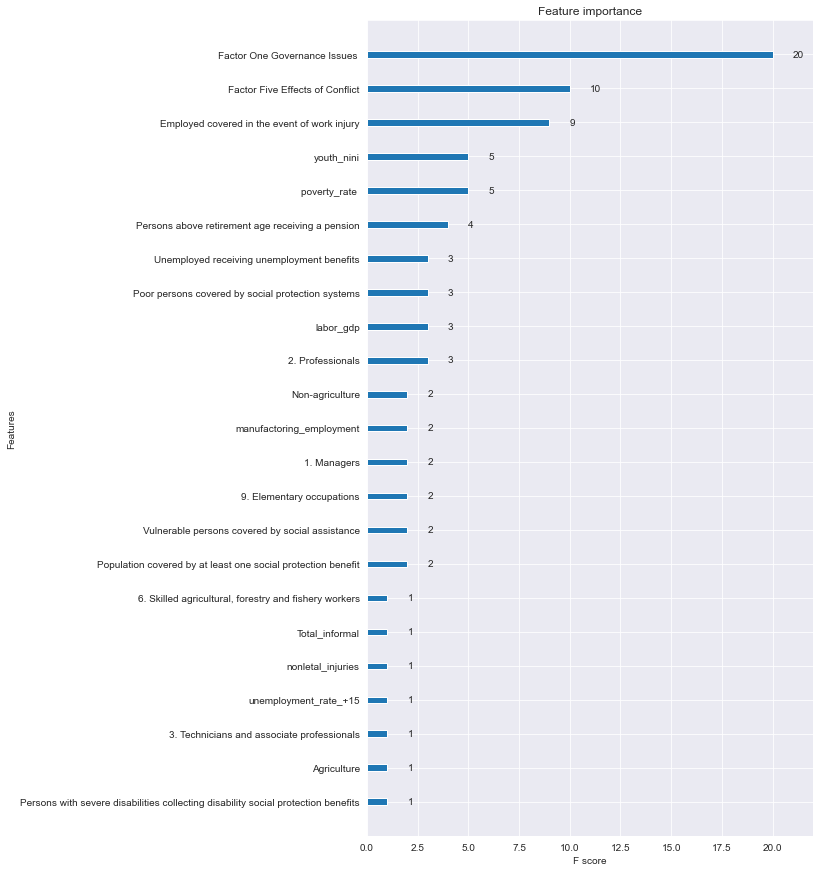

In [81]:
import xgboost as xgb

X, y = df_tmp.drop(["Final overall (normalised, weighted) vulnerability score","country",'Credit rating'],axis=1), df_tmp["Final overall (normalised, weighted) vulnerability score"]
dmatrix = xgb.DMatrix(data=X,label=y)

params = {"objective":"reg:squarederror",'colsample_bytree': 0.5,'learning_rate': 0.01,
                'max_depth': 6, 'alpha': 10}
xg_reg = xgb.train(params=params, dtrain=dmatrix, num_boost_round=10)
import matplotlib.pyplot as plt

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [8, 15]
plt.show()

In [82]:
list({k: v for k, v in xg_reg.get_score(importance_type='weight').items() if v > 2}.keys())

['Employed covered in the event of work injury',
 'Factor Five Effects of Conflict',
 'poverty_rate ',
 '2. Professionals',
 'Factor One Governance Issues ',
 'youth_nini',
 'labor_gdp',
 'Persons above retirement age receiving a pension',
 'Poor persons covered by social protection systems',
 'Unemployed receiving unemployment benefits']

In [83]:
df_tmp2 = df_tmp.copy()
df_tmp = df_tmp[list({k: v for k, v in xg_reg.get_score(importance_type='weight').items() if v > 3}.keys())]

In [84]:
df_tmp = pd.concat([df_tmp2[["country","Final overall (normalised, weighted) vulnerability score","Credit rating"]],df_tmp],axis=1)

In [85]:
import ppscore as pps
pps.predictors(df, "Final overall (normalised, weighted) vulnerability score")[['x', 'y', 'ppscore']]

,x,y,ppscore
0,Factor One Governance Issues,"Final overall (normalised, weighted) vulnerabi...",0.532802
1,poverty_rate,"Final overall (normalised, weighted) vulnerabi...",0.262870
2,Credit rating,"Final overall (normalised, weighted) vulnerabi...",0.251041
3,7. Craft and related trades workers,"Final overall (normalised, weighted) vulnerabi...",0.223297
4,1. Managers,"Final overall (normalised, weighted) vulnerabi...",0.214722
5,"6. Skilled agricultural, forestry and fishery ...","Final overall (normalised, weighted) vulnerabi...",0.205919
6,Region,"Final overall (normalised, weighted) vulnerabi...",0.200599
7,4. Clerical support workers,"Final overall (normalised, weighted) vulnerabi...",0.192782
8,2. Professionals,"Final overall (normalised, weighted) vulnerabi...",0.191560
9,Total_ocupacion,"Final overall (normalised, weighted) vulnerabi...",0.189908


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X, y = df_tmp.drop(["Final overall (normalised, weighted) vulnerability score","country",'Credit rating'],axis=1), df_tmp["Final overall (normalised, weighted) vulnerability score"]
dmatrix = xgb.DMatrix(data=X,label=y)
params={ 'objective':'reg:squarederror',
         'max_depth': 5, 
         'colsample_bylevel':1,
         'learning_rate':0.05,
         'random_state':20}
cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=25, metrics={'rmse'}, as_pandas=True, seed=20, num_boost_round=1000)
print('RMSE: %.2f' % cv_results['test-rmse-mean'].min())

RMSE: 4.84


In [87]:
from sklearn.model_selection import RandomizedSearchCV
params = {'max_depth': [2,3,4,5],
          'learning_rate': [0.03, 0.05, 0.07],
          'subsample': np.arange(0.5, 1.0, 0.1),
          'colsample_bytree': [1.0],
          'colsample_bylevel': [1.0],
          'n_estimators': [50, 100, 200]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)
clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'subsample': 0.5, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 1.0, 'colsample_bylevel': 1.0}
Lowest RMSE:  6.889732980554723


In [88]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.5,'learning_rate': 0.01,
                'max_depth': 6, 'alpha': 10}
xg_reg = xgb.train(params=params, dtrain=dmatrix, num_boost_round=10)
xg_reg.get_score(importance_type='weight')

{'Factor One Governance Issues ': 30,
 'Persons above retirement age receiving a pension': 7,
 'youth_nini': 9,
 'Employed covered in the event of work injury': 9,
 'poverty_rate ': 4,
 'Factor Five Effects of Conflict': 11}